In [ ]:
%cd aws-deepcomposer-samples-master/ar-cnn
!mkdir checkpoints outputs
!ls

/content/aws-deepcomposer-samples-master/ar-cnn
augmentation.py		 inference_parameters.json  readme.md
AutoRegressiveCNN.ipynb  inference.py		    requirements.txt
checkpoints		 LICENSE.txt		    sample_inputs
constants.py		 losses.py		    sample_outputs
data_generator.py	 model.py		    utils
images			 outputs


In [ ]:

!pip install -r requirements.txt

     |████████████████████████████████| 18.5MB 162kB/s 
     |████████████████████████████████| 5.6MB 21.0MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
  Created wheel for pypianoroll: filename=pypianoroll-0.5.3-cp36-none-any.whl size=23827 sha256=60e3b920a3316c335970d710dd260d98119be255f6d956d858f6bb075bd6e2e4
  Stored in directory: /root/.cache/pip/wheels/29/c8/c0/7b240ab723c2f96b03391796bdf278de513eabf1dfb989c07f
  Created wheel for music21: filename=music21-5.7.2-cp36-none-any.whl size=22024602 sha256=e9da69399f01286e31c3b96395e1008b7e76170e0860020e2e5da4eb802b6bf6
  Stored in directory: /root/.cache/pip/wheels/6e/d0/05/1ef3daa9ae295073d807e468fcd820641965086424f1c633e3
  Created wheel for pretty-midi: filename=pretty_midi-0.2.9-cp36-none-any.whl size=5591953 sha256=8f1bf4f8af1fb82fe3f5fdecf8088b659eef6106cb130f197592b138a8c4123f
  Stored in directory: /root/.cache/pip/wheels/4c/a1/c6/b5697841db1112c6e5866d75a6b6bf1bef73b874782556ba66
Successfully built pypianoroll mu

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import os
import glob
import json
import numpy as np
import keras
from enum import Enum
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, BatchNormalization, Dropout
from keras.optimizers import Adam, RMSprop
from keras import backend as K
from random import randrange
import random
import math
import pypianoroll
from utils.midi_utils import play_midi, plot_pianoroll, get_music_metrics, process_pianoroll, process_midi
from constants import Constants
from augmentation import AddAndRemoveAPercentageOfNotes
from data_generator import PianoRollGenerator
from utils.generate_training_plots import GenerateTrainingPlots
from inference import Inference
from model import OptimizerType
from model import ArCnnModel

Using TensorFlow backend.


Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)778240/45929032 bytes (1.7%)2031616/45929032 bytes (4.4%)3891200/45929032 bytes (8.5%)6545408/45929032 bytes (14.3%)10059776/45929032 bytes (21.9%)13549568/45929032 bytes (29.5%)17055744/45929032 bytes (37.1%)20422656/45929032 bytes (44.5%)23937024/45929032 bytes (52.1%)27648000/45929032 bytes (60.2%)31203328/45929032 bytes (67.9%)34627584/45929032 bytes (75.4%)3812556

In [ ]:
with open('inference_parameters.json') as json_file:
    inference_params = json.load(json_file)

In [ ]:
checkpoints = !ls -t checkpoints | head -n1
print(checkpoints)

['-best-model-epoch_0186.hdf5']


In [ ]:
inference_obj = Inference()
checkpoint_var = 'checkpoints/'+checkpoints[0]
inference_obj.load_model(checkpoint_var)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [ ]:
input_melody = 'sample_inputs/ode_to_joy.midi'  
inference_obj.generate_composition(input_melody, inference_params)

In [ ]:
outputs = !ls -t outputs | head -n1

In [ ]:
output_melody = 'outputs/'+outputs[0]
print(output_melody)

outputs/output_6.mid


In [ ]:
print("The input midi metrics are:")
get_music_metrics(input_melody, beat_resolution=4)

print("\n")
print("The generated output midi metrics are:")
get_music_metrics(output_melody, beat_resolution=4)

The input midi metrics are:
+----------------------+---------------+-----------------+----------------+
| n_pitch_classes_used | in_scale_rate | polyphonic_rate | n_pitches_used |
+======================+===============+=================+================+
| 4                    | 0.570         | 15              | 61.018         |
+----------------------+---------------+-----------------+----------------+


The generated output midi metrics are:
+----------------------+---------------+-----------------+----------------+
| n_pitch_classes_used | in_scale_rate | polyphonic_rate | n_pitches_used |
+======================+===============+=================+================+
| 5                    | 0.715         | 22              | 63.959         |
+----------------------+---------------+-----------------+----------------+


In [ ]:
input_pianoroll = process_midi(input_melody, beat_resolution=4)
output_pianoroll = process_midi(output_melody, beat_resolution=4)

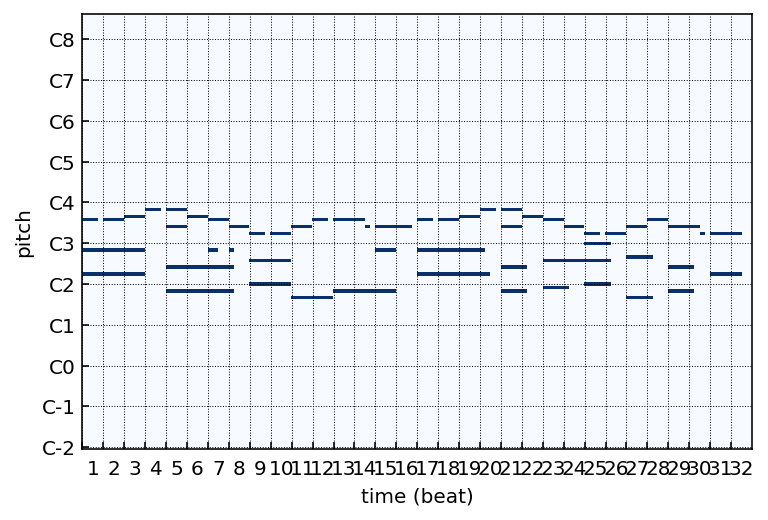

In [ ]:
plot_pianoroll(input_pianoroll, beat_resolution=4)

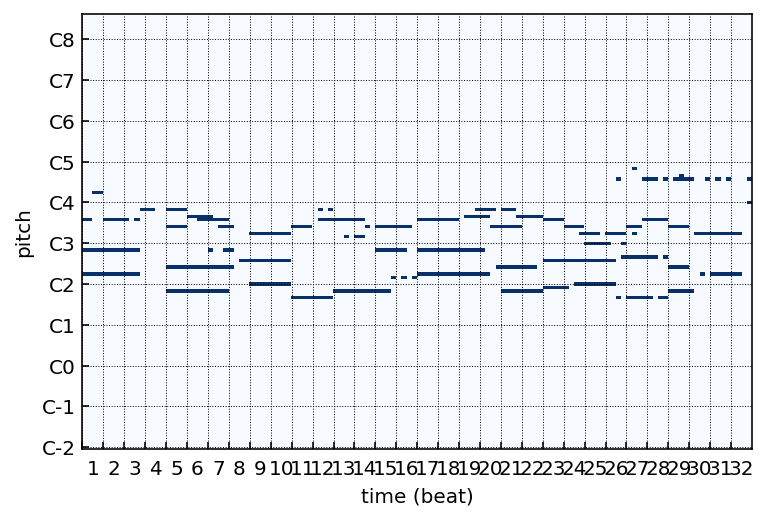

In [ ]:
plot_pianoroll(output_pianoroll, beat_resolution=4)